In [1]:
%load_ext autoreload
%autoreload 2

In [3]:

from algo.codec.brotli_algo import BrotliLibraryCompressionAlgorithm
from algo.codec.pca import PCACompression
from algo.codec.zstd import ZstdLibraryCompressionAlgorithm
from scaffold import Scaffold
from algo.process.tobinary import ConvertToBinaryProcessing
from algo.codec.zlib import ZlibCompression
from algo.codec.dummy import DummyCompressionAlgorithm

benchmarks = []
Algos = [PCACompression(7), BrotliLibraryCompressionAlgorithm(), ZstdLibraryCompressionAlgorithm(), ZlibCompression(), DummyCompressionAlgorithm()]
Processes = [ConvertToBinaryProcessing()]
for algo in Algos:
    for proc in Processes:
        a = Scaffold(algo, proc, "../data/sample_dataset.csv")
        a.start("test", logs=True)
        print(a.benchmark)
        benchmarks.append(a.benchmark)
        print("---------------------")

transformed head: [ 3.33105404e+07 -2.10679374e+04  7.46939945e+02  3.71787401e+02
  3.84941928e+01 -1.00070936e+02  6.21619317e+00]
pca scores:  -136.42284938366157 [-125.73567663 -125.75742107 -125.76866856 ... -136.14307982 -136.0358034
 -135.96509083]
restored:  [1.51502400e+09 1.51493762e+09 1.29926289e+03 1.29923938e+03
 3.10398625e+05 3.15511094e+05 1.76194165e+03 1.76491917e+03
 7.60233873e+01 7.87119204e+01 1.48887652e+02 1.49137579e+02
 1.47892343e+02 4.24061530e+03 1.77571173e+03 8.98138165e+02
 1.39704012e+02 1.46761782e+02 8.99026897e+00 3.58908045e+03
 2.46496667e+01 1.68139398e+01 2.94935853e-01 2.27944490e+02
 1.02229915e+02 9.12716111e+01]
src  end_epoch      1.515024e+09
start_epoch    1.514938e+09
value_1        1.298598e+03
value_2        1.299834e+03
value_3        3.103986e+05
value_4        3.155111e+05
value_5        1.761728e+03
value_6        1.765279e+03
value_7        7.723552e+01
value_8        8.269333e+01
value_9        1.497170e+02
value_10       1.49694

In [ ]:
from scaffold.json import json_scaffold
json_scaffold("plug_config.json")

0.1486662301226262
0.18806945543070086
0.20704367709938457
0.25628488387352005
0.6726111111496452
[{'name': 'PCACompression', 'table_path': '../data/sample_dataset.csv', 'isLossLess': False, 'isLearning': False, 'compression_rate': 0.1486662301226262, 'preprocess_and_compress_time': 20.419745683670044, 'loss_rate': 9, 'decompress_and_postprocess_time': 18.02737784385681, 'test_time': 38.447123527526855}, {'name': 'BrotliLibraryCompressionAlgorithm', 'table_path': '../data/sample_dataset.csv', 'isLossLess': True, 'isLearning': False, 'compression_rate': 0.18806945543070086, 'preprocess_and_compress_time': 617.0260574817657, 'loss_rate': 12, 'decompress_and_postprocess_time': 12.902795314788818, 'test_time': 629.9288527965546}, {'name': 'ZstdLibraryCompressionAlgorithm', 'table_path': '../data/sample_dataset.csv', 'isLossLess': True, 'isLearning': False, 'compression_rate': 0.20704367709938457, 'preprocess_and_compress_time': 48.891963958740234, 'loss_rate': 10, 'decompress_and_postproce

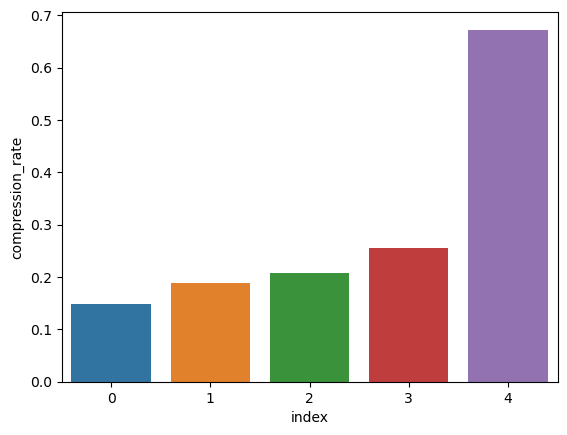

In [4]:
from plot import plot_benchmarks

plot_benchmarks(benchmarks, "compression_rate")
for i in benchmarks:
    print(i["compression_rate"])
print(benchmarks)

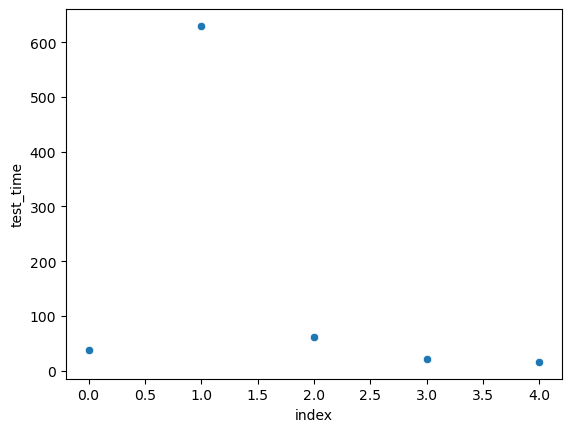

In [5]:
from plot import plot_scatter

plot_scatter(benchmarks, "test_time")

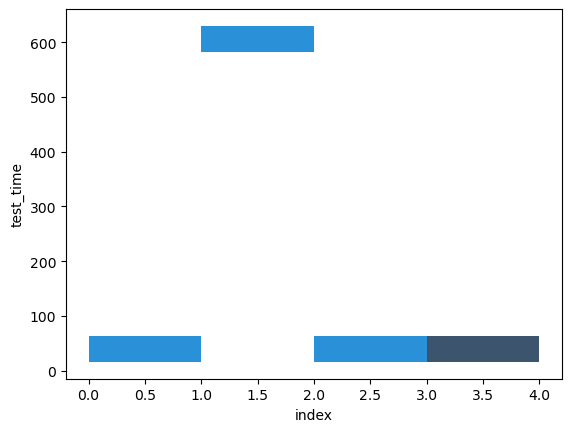

In [6]:
from plot import plot_hist

plot_hist(benchmarks, "test_time")